In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("D:\\Downloads\\Netflix Movies Dataset.csv")
print(df)
df.head(5)

     Release_Date                                 Title  \
0      15-12-2021               Spider-Man: No Way Home   
1      01-03-2022                            The Batman   
2      25-02-2022                               No Exit   
3      24-11-2021                               Encanto   
4      22-12-2021                        The King's Man   
...           ...                                   ...   
9822   15-10-1973                              Badlands   
9823   01-10-2020                      Violent Delights   
9824   06-05-2016                          The Offering   
9825   31-03-2021  The United States vs. Billie Holiday   
9826   23-09-1984                               Threads   

                                               Overview  Popularity  \
0     Peter Parker is unmasked and no longer able to...    5083.954   
1     In his second year of fighting crime, Batman u...    3827.658   
2     Stranded at a rest stop in the mountains durin...    2618.087   
3     T

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.1+ KB


In [4]:
df.duplicated().sum()

0

# Summary:
 
### - Here we have 9837 rows and 9 columns
### - There is no NaNs values and no duplicate Values in this data
### - Here we have to chnage the "Release_Date" str to Data and time type to extract the "Release Year"
### - No requirment of thses Overview,Original_Language,Poster_Url columns so we will drop these columns by using
### - We have to change the data type of  Popularity  and Vote_Average into int and float.
### - Genear column have , separed value with white spare we need to handle and cast into category 

In [5]:
df["Release_Date"]=pd.to_datetime(df["Release_Date"], format="%d-%m-%Y")
print(df["Release_Date"].dtype)

datetime64[ns]


In [6]:
df["Release_Date"]=df["Release_Date"].dt.year
print(df["Release_Date"].dtype)

int32


In [7]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## Dropping Overview,Original_Language,Poster_Url columns

In [8]:
columns=["Overview","Original_Language","Poster_Url"]
df.drop(columns,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [9]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


### Now we will categories the average_rate column poopular,average,below_average,not_popular by creating a fun named catigorize_col()

In [10]:
def catigorize_col(df,col,label):
    edges=[ df[col].describe()["min"],
           df[col].describe()["25%"],
            df[col].describe()["50%"],
            df[col].describe()["75%"],
            df[col].describe()["max"]]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates="drop")
    return df

In [11]:
labels=["Not_popular","Below_average","Average","Poopular"]
catigorize_col(df,"Vote_Average",labels) 
df["Vote_Average"].unique() 

['Poopular', 'Below_average', 'Average', 'Not_popular', NaN]
Categories (4, object): ['Not_popular' < 'Below_average' < 'Average' < 'Poopular']

In [12]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,Poopular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,Poopular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,Below_average,Thriller
3,2021,Encanto,2402.201,5076.0,Poopular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,Average,"Action, Adventure, Thriller, War"


In [13]:
df["Vote_Average"].value_counts()

Vote_Average
Not_popular      2467
Poopular         2450
Average          2411
Below_average    2398
Name: count, dtype: int64

In [14]:
df["Vote_Count"]=pd.to_numeric(df["Vote_Count"])
print(df["Vote_Count"].dtype)

float64


In [15]:
df.dropna(inplace=True)


In [16]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

## we wil  split  gener into a list then explore our data frame to have only one genore per row for each movie

In [17]:
# Step 1: Split genre strings into lists
df["Genre"] = df["Genre"].str.split(", ")

# Step 2: Explode list of genres into multiple rows
df = df.explode("Genre").reset_index(drop=True)

# Step 3 (Optional): Remove any extra whitespace
df["Genre"] = df["Genre"].str.strip()

# Step 4 (Optional): Ensure Genre is of type object
df["Genre"] = df["Genre"].astype("object")




In [18]:
# Step 5: Check the result
print(df.head(5))
print(df["Genre"].unique())

   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954      8940.0     Poopular   
1          2021  Spider-Man: No Way Home    5083.954      8940.0     Poopular   
2          2021  Spider-Man: No Way Home    5083.954      8940.0     Poopular   
3          2022               The Batman    3827.658      1151.0     Poopular   
4          2022               The Batman    3827.658      1151.0     Poopular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  
3            Crime  
4          Mystery  
['Action' 'Adventure' 'Science Fiction' 'Crime' 'Mystery' 'Thriller'
 'Animation' 'Comedy' 'Family' 'Fantasy' 'War' 'Horror' 'Drama' 'Music'
 'Romance' 'Western' 'History' 'TV Movie' 'Documentary']


In [19]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,Poopular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,Poopular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,Poopular,Science Fiction
3,2022,The Batman,3827.658,1151.0,Poopular,Crime
4,2022,The Batman,3827.658,1151.0,Poopular,Mystery


# Here i chnage the data type of the column from float to Category

In [20]:
df["Genre"]=df["Genre"].astype("category")
df["Genre"].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(2), int32(1), object(1)
memory usage: 749.6+ KB


In [22]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [23]:
df["Genre"].value_counts()

Genre
Drama              3715
Comedy             3006
Action             2652
Thriller           2473
Adventure          1829
Romance            1461
Horror             1457
Animation          1425
Family             1405
Fantasy            1295
Science Fiction    1255
Crime              1235
Mystery             765
History             426
War                 307
Music               291
TV Movie            214
Documentary         203
Western             137
Name: count, dtype: int64

In [24]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,Poopular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,Poopular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,Poopular,Science Fiction
3,2022,The Batman,3827.658,1151.0,Poopular,Crime
4,2022,The Batman,3827.658,1151.0,Poopular,Mystery


# Visualization 

##  What is the most frequent genre of movies realesed on Netflix ?

In [25]:
df["Genre"].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

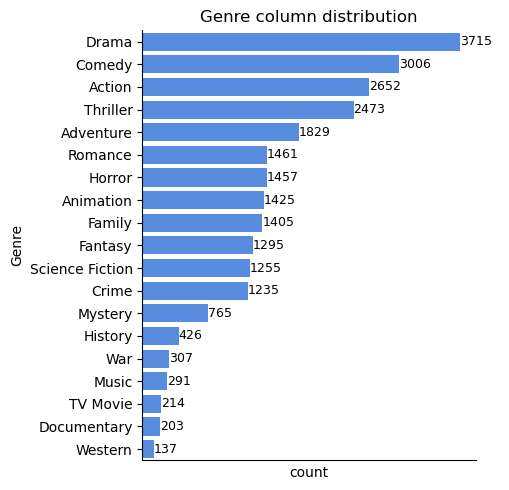

In [26]:
plot=sns.catplot(y="Genre",
            data=df,
            kind="count",
            order=df["Genre"].value_counts().index,
            color="#4287f5")

# Access the Axes object
ax = plot.ax

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)
    
# Remove x-axis labels and ticks
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
plt.title("Genre column distribution")
plt.tight_layout()
plt.show()


# Which has highest votes in Vote_Average column?

In [27]:
df["Vote_Average"].value_counts()

Vote_Average
Average          6612
Poopular         6520
Below_average    6348
Not_popular      6071
Name: count, dtype: int64

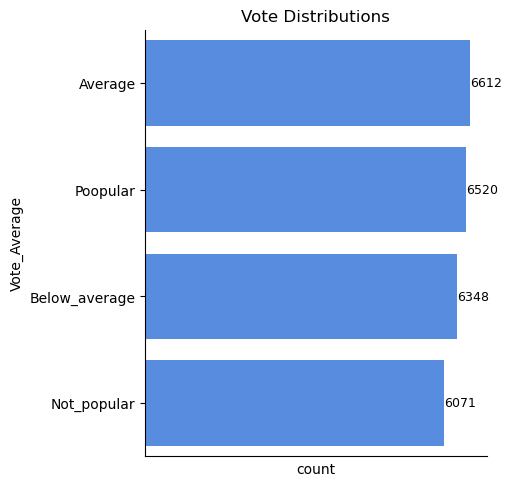

In [28]:
plot=sns.catplot(y="Vote_Average",
                 data=df,
                 kind="count",
                 order=df["Vote_Average"].value_counts().index,
                 color="#4287f5")
# Access the Axes object
ax = plot.ax

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)
    
# Remove x-axis labels and ticks
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.title("Vote Distributions")
plt.show()

# What movie got the highest popularity ? what's its genre ?

In [29]:
df[df["Popularity"]== df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,Poopular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,Poopular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,Poopular,Science Fiction


# What movie got the lowest popularity ? what's its genre ?

In [30]:
df[df["Popularity"]== df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152.0,Average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152.0,Average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152.0,Average,History
25548,1984,Threads,13.354,186.0,Poopular,War
25549,1984,Threads,13.354,186.0,Poopular,Drama
25550,1984,Threads,13.354,186.0,Poopular,Science Fiction


# which year has the most  filmed  movies ?

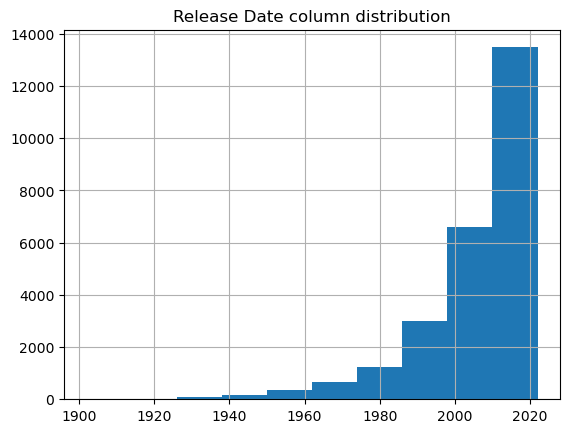

In [31]:
df["Release_Date"].hist()
plt.title("Release Date column distribution")
plt.show()

# Conclusion 

## Q1: Waht is the most frequent genre in the Database?
### Drama Gener is the most frequent genre in this Dataset than other gnres
## Q2: What gener has the highest votes?
### again Drama gener has the most Height Vote and its comes under Popular Categoryabs
## Q3: What movie got the highest popularity ? what's its genre ?
### The Movie "Spider-Man: No Way Home" got the heights popularity , relesed in 2021 and its genre is Action,Adventure and Science friction 
## Q4:  What movie got the lowest popularity ? what's its genre ?
### "The United States[Music,drama,History] vs. Billie Holiday" and "Threads" [War,Drama,Science Friction]  these two movie got the lowest popularity 
## Q5: Which year has the most filmmed year? 
###  2020  has the highest filmmed rate in this dataset